In [3]:
from qmcpy import *
import numpy as np
from pandas import *
import scipy as sc
from sympy import *
import matplotlib.pyplot as plt

In [22]:
class Estimator:
    def __init__(self, sigma=1, mean=0, n=1024, h=0.001,a=0,b=10,m=10):
        self.sampler=Sobol(1).gen_samples(n)
        self.sigma=sigma
        self.mean=mean
        self.n=n
        self.h=h
        self.m=int(m)
        self.x = np.linspace(-1000, 1000, 10000)
        self.k=self.gaussian(self.x,self.mean, self.sigma)
        self.a=a
        self.b=b
        self.points=np.random.uniform(self.a,self.b,self.m)
        
    def density_estimation(self):
        f=zeros(self.m,1)
        for i in range (self.m):
            for p in range (self.n):
                f[i]+=(1/self.n)*(1/self.h)*self.k[int(((self.points[i]-self.sampler[p])/self.h))]
        plt.plot(self.x,self.k,label='gauss')
        plt.plot(f,label='estimation')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('f')
        plt.xlim(-15, 15)
        plt.show()
        return f        
    
    def mise(self):
        est=np.squeeze(self.density_estimation())
        #real_distrib=self.gaussian(self.points,2, 1) we define a distribution to estimate
        integrand=((est-real_distrib)*np.random.normal(2,1,self.m))**2
        ex=np.trapz(integrand)
        return ex
        return mise
    def gaussian(self, x, mu, sigma):
        return 1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(- (x - mu)**2 / (2 * sigma**2))


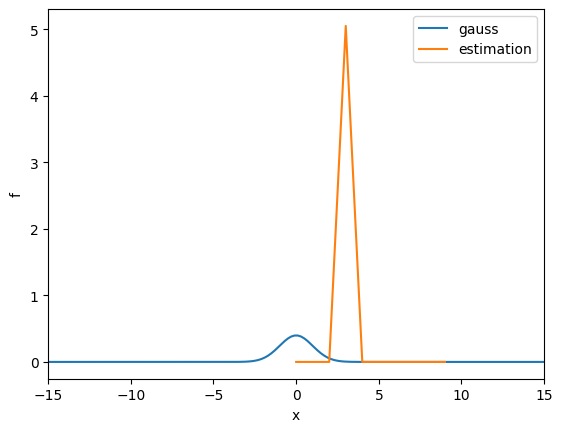

0.505142921560747


In [23]:
est=Estimator()
f=est.density_estimation()
#mise=est.mise()
mean=np.mean(f)
#print(mise)
#print(f)
print(mean)

In [18]:
class KDEstimator:
    def __init__(self, sigma=1, mean=0, n=1024, h=0.001,a=0,b=10,m=10):
        self.sampler=Sobol(1).gen_samples(n)
        self.sigma=sigma
        self.mean=mean
        self.n=n
        self.h=h
        self.m=int(m)
        self.x = np.linspace(-1000, 1000, 100000)
        self.k=self.gaussian(self.x,self.mean, self.sigma)
        self.a=a
        self.b=b
        self.points=np.random.uniform(self.a,self.b,self.m)
        self.observations=np.random.normal(2,1,self.n)
        #simulation of observations, other distributions (Gaussian, Bernoulli..) could be applied
        
    def density_estimation(self):
        f=zeros(self.m,1)
        for i in range (self.m):
            for p in range (self.n):
                f[i]+=(1/self.n)*(1/self.h)*self.k[int(((self.points[i]-self.observations[p])/self.h))]
        plt.plot(f,label='estimation')
        plt.plot(self.x,self.gaussian(self.x,2,1),label='gauss')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('f')
        plt.xlim(-15, 15)
        plt.show()
        return f        
    
    def mise(self):
        est=np.squeeze(self.density_estimation())
        real_distrib=self.gaussian(self.points,2, 1)
        integrand=((est-real_distrib)*np.random.normal(2,1,self.m))**2
        ex=np.trapz(integrand)
        return ex
    def gaussian(self, x, mu, sigma):
        return 1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(- (x - mu)**2 / (2 * sigma**2))


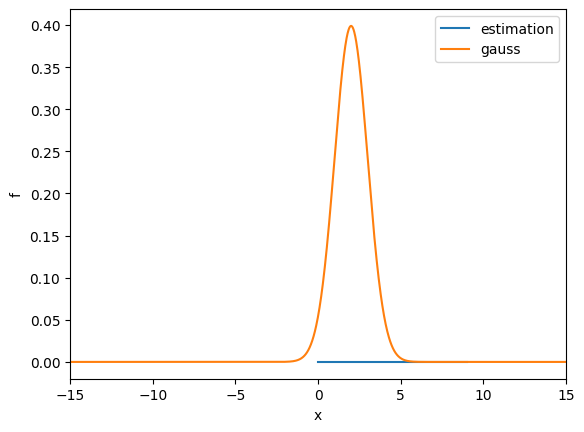

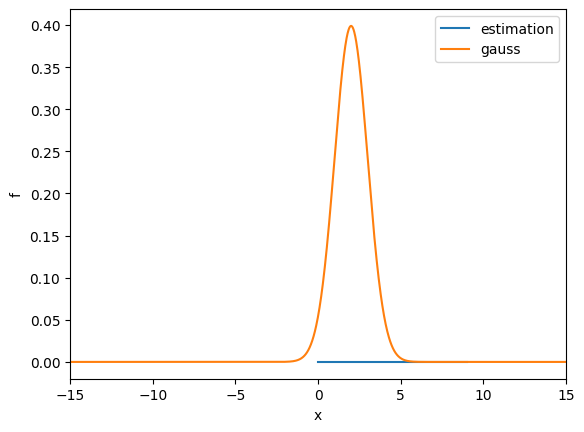

1.41623354193492


In [19]:
est=KDEstimator()
f=est.density_estimation()
mise=est.mise()
mean=np.mean(f)
print(mise)
#print(f)
#print(mean)